# 官方教程 - 10分钟入门pandas

> 教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！

首先导入 Python 数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-02,-0.609279,1.726108,-0.039693,0.809049
2013-01-03,1.000164,-0.350926,1.899104,-0.176186
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336
2013-01-05,-0.301625,0.979618,-0.075667,1.218176
2013-01-06,-0.761508,0.605632,1.863276,0.743593


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-02,-0.609279,1.726108,-0.039693,0.809049
2013-01-03,1.000164,-0.350926,1.899104,-0.176186
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336
2013-01-05,-0.301625,0.979618,-0.075667,1.218176


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336
2013-01-05,-0.301625,0.979618,-0.075667,1.218176
2013-01-06,-0.761508,0.605632,1.863276,0.743593


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.39415946, -0.49242624,  0.38331028,  1.07358882],
       [-0.60927866,  1.72610816, -0.03969318,  0.80904943],
       [ 1.00016387, -0.35092596,  1.89910384, -0.17618609],
       [-0.55417544, -1.44367095, -1.70604449, -0.4453357 ],
       [-0.30162477,  0.97961766, -0.07566746,  1.21817554],
       [-0.76150755,  0.60563194,  1.86327622,  0.74359311]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.138711,0.170722,0.387381,0.537148
std,0.691296,1.147243,1.359619,0.684432
min,-0.761508,-1.443671,-1.706044,-0.445336
25%,-0.595503,-0.457051,-0.066674,0.053759
50%,-0.427900,0.127353,0.171809,0.776321
75%,0.220213,0.886121,1.493285,1.007454
max,1.000164,1.726108,1.899104,1.218176


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.394159,-0.609279,1.000164,-0.554175,-0.301625,-0.761508
B,-0.492426,1.726108,-0.350926,-1.443671,0.979618,0.605632
C,0.383310,-0.039693,1.899104,-1.706044,-0.075667,1.863276
D,1.073589,0.809049,-0.176186,-0.445336,1.218176,0.743593


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.073589,0.383310,-0.492426,0.394159
2013-01-02,0.809049,-0.039693,1.726108,-0.609279
2013-01-03,-0.176186,1.899104,-0.350926,1.000164
2013-01-04,-0.445336,-1.706044,-1.443671,-0.554175
2013-01-05,1.218176,-0.075667,0.979618,-0.301625
2013-01-06,0.743593,1.863276,0.605632,-0.761508


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-03,1.000164,-0.350926,1.899104,-0.176186
2013-01-06,-0.761508,0.605632,1.863276,0.743593
2013-01-05,-0.301625,0.979618,-0.075667,1.218176
2013-01-02,-0.609279,1.726108,-0.039693,0.809049


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01    0.394159
2013-01-02   -0.609279
2013-01-03    1.000164
2013-01-04   -0.554175
2013-01-05   -0.301625
2013-01-06   -0.761508
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-02,-0.609279,1.726108,-0.039693,0.809049
2013-01-03,1.000164,-0.350926,1.899104,-0.176186


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.609279,1.726108,-0.039693,0.809049
2013-01-03,1.000164,-0.350926,1.899104,-0.176186
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A    0.394159
B   -0.492426
C    0.383310
D    1.073589
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.394159,-0.492426
2013-01-02,-0.609279,1.726108
2013-01-03,1.000164,-0.350926
2013-01-04,-0.554175,-1.443671
2013-01-05,-0.301625,0.979618
2013-01-06,-0.761508,0.605632


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.609279,1.726108
2013-01-03,1.000164,-0.350926
2013-01-04,-0.554175,-1.443671


In [27]:
df.loc['20130102',['A','B']]

A   -0.609279
B    1.726108
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

0.3941594596423122

In [29]:
df.at[dates[0],'A']

0.3941594596423122

### 通过位置选取数据

In [30]:
df.iloc[3]

A   -0.554175
B   -1.443671
C   -1.706044
D   -0.445336
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.554175,-1.443671
2013-01-05,-0.301625,0.979618


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.609279,-0.039693
2013-01-03,1.000164,1.899104
2013-01-05,-0.301625,-0.075667


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,-0.609279,1.726108,-0.039693,0.809049
2013-01-03,1.000164,-0.350926,1.899104,-0.176186


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.492426,0.383310
2013-01-02,1.726108,-0.039693
2013-01-03,-0.350926,1.899104
2013-01-04,-1.443671,-1.706044
2013-01-05,0.979618,-0.075667
2013-01-06,0.605632,1.863276


In [35]:
df.iloc[1, 1]

1.7261081611409281

In [36]:
df.iat[1, 1]

1.7261081611409281

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-03,1.000164,-0.350926,1.899104,-0.176186


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,0.394159,NaN,0.383310,1.073589
2013-01-02,NaN,1.726108,NaN,0.809049
2013-01-03,1.000164,NaN,1.899104,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.979618,NaN,1.218176
2013-01-06,NaN,0.605632,1.863276,0.743593


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,0.394159,-0.492426,0.383310,1.073589,one
2013-01-02,-0.609279,1.726108,-0.039693,0.809049,one
2013-01-03,1.000164,-0.350926,1.899104,-0.176186,two
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336,three
2013-01-05,-0.301625,0.979618,-0.075667,1.218176,four
2013-01-06,-0.761508,0.605632,1.863276,0.743593,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.000164,-0.350926,1.899104,-0.176186,two
2013-01-05,-0.301625,0.979618,-0.075667,1.218176,four


## 缺失值处理

**reindex**

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,E
2013-01-01,0.394159,-0.492426,0.383310,1.073589,1.0
2013-01-02,-0.609279,1.726108,-0.039693,0.809049,1.0
2013-01-03,1.000164,-0.350926,1.899104,-0.176186,NaN
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336,NaN


### 删除缺失值
舍弃含有NaN的行

In [46]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.394159,-0.492426,0.383310,1.073589,1.0
2013-01-02,-0.609279,1.726108,-0.039693,0.809049,1.0


### 填充缺失值
填充缺失数据

In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.394159,-0.492426,0.383310,1.073589,1.0
2013-01-02,-0.609279,1.726108,-0.039693,0.809049,1.0
2013-01-03,1.000164,-0.350926,1.899104,-0.176186,5.0
2013-01-04,-0.554175,-1.443671,-1.706044,-0.445336,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [49]:
df.mean()

A   -0.138711
B    0.170722
C    0.387381
D    0.537148
dtype: float64

横向求均值

In [50]:
df.mean(1)

2013-01-01    0.339658
2013-01-02    0.471546
2013-01-03    0.593039
2013-01-04   -1.037307
2013-01-05    0.455125
2013-01-06    0.612748
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.000164,-1.350926,0.899104,-1.176186
2013-01-04,-3.554175,-4.443671,-4.706044,-3.445336
2013-01-05,-5.301625,-4.020382,-5.075667,-3.781824
2013-01-06,NaN,NaN,NaN,NaN


### Apply函数

In [54]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.394159,-0.492426,0.383310,1.073589
2013-01-02,-0.215119,1.233682,0.343617,1.882638
2013-01-03,0.785045,0.882756,2.242721,1.706452
2013-01-04,0.230869,-0.560915,0.536676,1.261116
2013-01-05,-0.070756,0.418703,0.461009,2.479292
2013-01-06,-0.832263,1.024335,2.324285,3.222885


In [55]:
df.apply(lambda x: x.max() - x.min())

A    1.761671
B    3.169779
C    3.605148
D    1.663511
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [57]:
s

0    1
1    6
2    6
3    1
4    6
5    6
6    6
7    5
8    0
9    6
dtype: int64

In [58]:
s.value_counts()

6    6
1    2
5    1
0    1
dtype: int64

### 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))

In [62]:
df

,0,1,2,3
0,0.596858,1.782033,-1.571379,0.115992
1,-0.561880,-0.157695,-0.589239,-1.243387
2,0.403353,0.218715,1.971327,0.137835
3,-2.278051,1.798855,0.266264,-0.322433
4,0.053156,1.171847,1.035180,0.713015
5,-0.468641,0.472170,-2.771143,-0.306635
6,-0.512281,1.912250,-0.149754,-1.578854
7,0.475661,-2.148944,0.519098,0.151327
8,0.704558,1.489972,-1.093994,-0.026055
9,0.706745,-0.409930,0.284364,1.319572


In [63]:
pieces = [df[:3], df[3:6], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,0.596858,1.782033,-1.571379,0.115992
1,-0.561880,-0.157695,-0.589239,-1.243387
2,0.403353,0.218715,1.971327,0.137835
3,-2.278051,1.798855,0.266264,-0.322433
4,0.053156,1.171847,1.035180,0.713015
5,-0.468641,0.472170,-2.771143,-0.306635
7,0.475661,-2.148944,0.519098,0.151327
8,0.704558,1.489972,-1.093994,-0.026055
9,0.706745,-0.409930,0.284364,1.319572


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [66]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [71]:
df

,A,B,C,D
0,-0.098111,0.094474,0.688292,-0.732176
1,-0.138902,-0.186822,-0.180680,0.333846
2,0.974490,-1.483374,-0.302478,0.479309
3,-1.490236,1.267644,3.006606,1.177489
4,-0.503264,0.446565,-1.294982,0.656664
5,-0.370421,1.926136,1.965023,0.894837
6,0.425828,0.819938,-0.146603,-0.085270
7,-0.670099,0.078547,0.201985,-1.211751


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.098111,0.094474,0.688292,-0.732176
1,-0.138902,-0.186822,-0.180680,0.333846
2,0.974490,-1.483374,-0.302478,0.479309
3,-1.490236,1.267644,3.006606,1.177489
4,-0.503264,0.446565,-1.294982,0.656664
5,-0.370421,1.926136,1.965023,0.894837
6,0.425828,0.819938,-0.146603,-0.085270
7,-0.670099,0.078547,0.201985,-1.211751
8,-1.490236,1.267644,3.006606,1.177489


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.831053,2.111290
1,bar,one,1.302816,0.600547
2,foo,two,0.660079,-0.995598
3,bar,three,-0.216393,0.879498
4,foo,two,-0.475032,0.287562
5,bar,two,-0.096699,1.054873
6,foo,one,0.830280,-1.580044
7,foo,three,0.714775,0.875498


In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,0.989724,2.534919
foo,0.899050,0.698709


In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.302816  0.600547
    three -0.216393  0.879498
    two   -0.096699  1.054873
foo one   -0.000773  0.531246
    three  0.714775  0.875498
    two    0.185047 -0.708036

## 数据重塑

### 数据堆叠
可以进行数据压缩

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [78]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [79]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [80]:
df2 = df[:4]

In [81]:
df2

A         B
first second                    
bar   one    -1.066377  1.344897
      two    -1.191131  0.123860
baz   one     0.338264  1.154701
      two    -0.069626  0.383915

In [82]:
stacked = df2.stack()

In [83]:
stacked

first  second   
bar    one     A   -1.066377
               B    1.344897
       two     A   -1.191131
               B    0.123860
baz    one     A    0.338264
               B    1.154701
       two     A   -0.069626
               B    0.383915
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [84]:
stacked.unstack()

A         B
first second                    
bar   one    -1.066377  1.344897
      two    -1.191131  0.123860
baz   one     0.338264  1.154701
      two    -0.069626  0.383915

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.066377 -1.191131
      B  1.344897  0.123860
baz   A  0.338264 -0.069626
      B  1.154701  0.383915

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.066377  0.338264
       B  1.344897  1.154701
two    A -1.191131 -0.069626
       B  0.123860  0.383915

### 数据透视表

In [87]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [88]:
df

,A,B,C,D,E
0,one,A,foo,-0.586486,0.871946
1,one,B,foo,0.920716,-0.785227
2,two,C,foo,-1.921419,-0.561713
3,three,A,bar,-0.458445,1.108625
4,one,B,bar,0.678694,1.020447
5,one,C,bar,-0.095313,-0.445732
6,two,A,foo,1.638476,-2.750891
7,three,B,foo,-1.617091,1.779085
8,one,C,foo,-0.798762,-1.183342
9,one,A,bar,0.586144,-0.382857


In [89]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.586144 -0.586486
      B  0.678694  0.920716
      C -0.095313 -0.798762
three A -0.458445       NaN
      B       NaN -1.617091
      C -1.385759       NaN
two   A       NaN  1.638476
      B  0.307489       NaN
      C       NaN -1.921419

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [91]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [92]:
ts.resample('5Min').sum()

2012-01-01    26906
Freq: 5T, dtype: int64

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [94]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [95]:
ts

2012-03-06    1.755196
2012-03-07   -1.070043
2012-03-08    0.137360
2012-03-09    0.579221
2012-03-10   -1.519504
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00    1.755196
2012-03-07 00:00:00+00:00   -1.070043
2012-03-08 00:00:00+00:00    0.137360
2012-03-09 00:00:00+00:00    0.579221
2012-03-10 00:00:00+00:00   -1.519504
Freq: D, dtype: float64

时区转换

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.755196
2012-03-06 19:00:00-05:00   -1.070043
2012-03-07 19:00:00-05:00    0.137360
2012-03-08 19:00:00-05:00    0.579221
2012-03-09 19:00:00-05:00   -1.519504
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [99]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [101]:
ts

2012-01-31    0.699275
2012-02-29   -0.142494
2012-03-31    0.975949
2012-04-30    0.860501
2012-05-31   -0.628000
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()

In [103]:
ps

2012-01    0.699275
2012-02   -0.142494
2012-03    0.975949
2012-04    0.860501
2012-05   -0.628000
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01    0.699275
2012-02-01   -0.142494
2012-03-01    0.975949
2012-04-01    0.860501
2012-05-01   -0.628000
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [106]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [107]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [108]:
ts.head()

1990-03-01 09:00   -1.671360
1990-06-01 09:00   -0.909903
1990-09-01 09:00    1.221687
1990-12-01 09:00    0.486579
1991-03-01 09:00    0.245105
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [110]:
df['grade'] = df['raw_grade'].astype("category")

In [111]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [114]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [115]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts.head()

2000-01-01   -0.551282
2000-01-02   -1.919176
2000-01-03   -0.729501
2000-01-04   -1.001043
2000-01-05   -0.847218
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

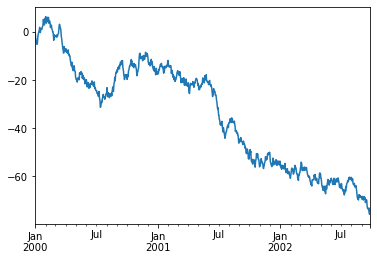

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [122]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

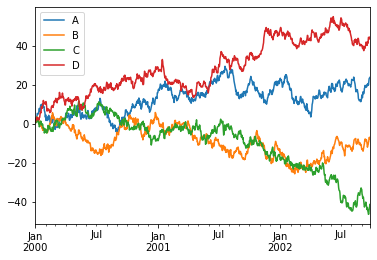

In [123]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [124]:
# df.to_csv('foo.csv')

从`csv`中读取数据

In [125]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [126]:
# df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [127]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [128]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [129]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()